# I. Preparing data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Import lib

In [2]:
import numpy as np
import os
import pandas as pd

Define directions

In [3]:
ORIGINAL_DATA_dir = 'DATASETS/ORIGINAL_DATA'
STUDIED_DATA_dir = 'DATASETS/STUDIED_DATA'

## I.1 Exploring real data

In [4]:
X_orig = np.loadtxt(os.path.join(ORIGINAL_DATA_dir, 'MLComp/MLComp.data'))

Data statistics:

In [5]:
from data_statistics import *
from random_data_generator import add_missing_value, plot_matrix_with_missing_value
print "sparsity = %f"%sparsity(X_orig)
print "Number of models = %i"%num_model(X_orig)
print "Number of datasets = %i"%num_dataset(X_orig)
if sparsity(X_orig) == 0:
    print "Rank of matrix = %i"%rank(X_orig)
else:
    print "Matrix contains NaN, cannot define the rank"
print 'Ave_corr_tasks = %f'%ave_corr_rows(X_orig)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_orig)
plot_matrix_with_missing_value(X_orig[:100, :100])

sparsity = 0.932033
Number of models = 384
Number of datasets = 724
Matrix contains NaN, cannot define the rank
Ave_corr_tasks = nan
Ave_corr_algs = nan


data_statistics.py:39: RuntimeWarning: Mean of empty slice
  return np.nanmean(abs(corr))
data_statistics.py:51: RuntimeWarning: Mean of empty slice
  return np.nanmean(abs(corr))


TypeError: plot_matrix_with_missing_value() takes exactly 2 arguments (1 given)

Load processed data.
Note: Datasets in STUDIED_DATA_dir are all the same as they are in ORIGINAL_DATA_dir, except for MLComp for which we processed to extract a dense part of the original data to reduce the sparsity.

### I.1.1 Statlog (complete matrix, no missing value)

In [6]:
X_statlog = np.loadtxt(os.path.join(STUDIED_DATA_dir, 'statlog/statlog.data'))
X_statlog = standardize(X_statlog)

NameError: name 'standardize' is not defined

In [7]:
print "sparsity = %f"%sparsity(X_statlog)
print "Number of models = %i"%num_model(X_statlog)
print "Number of datasets = %i"%num_dataset(X_statlog)
if sparsity(X_statlog) == 0:
    print "Rank of matrix = %i"%rank(X_statlog)
else:
    print "Matrix contains NaN, cannot define the rank"
print 'Ave_corr_tasks = %f'%ave_corr_rows(X_statlog)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_statlog)
# plot_matrix_with_missing_value(X_statlog)

sparsity = 0.000000
Number of models = 24
Number of datasets = 22
Rank of matrix = 22
Ave_corr_tasks = 0.397056
Ave_corr_algs = 0.288719


/Users/lishengsun/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


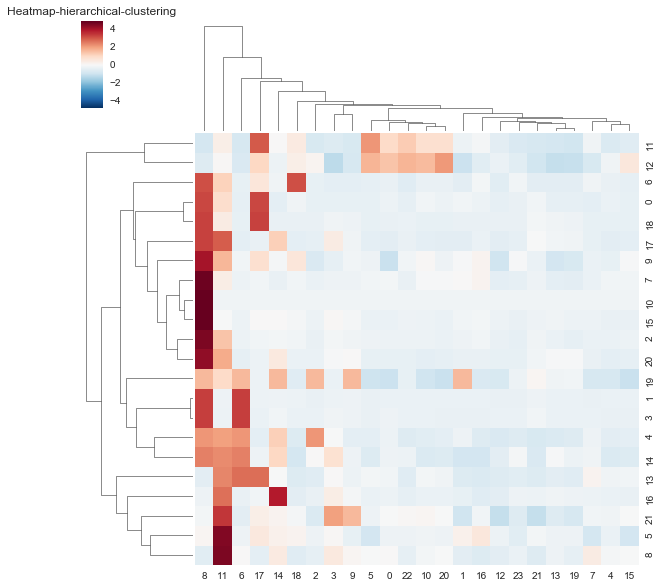

In [8]:
import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(X_statlog,metric="euclidean")
plt.title('Heatmap-hierarchical-clustering')
plt.show()


sparsity = 0.000000
Number of models = 24
Number of datasets = 22
Rank of matrix = 21
Ave_corr_tasks = 0.253227
Ave_corr_algs = 0.247775


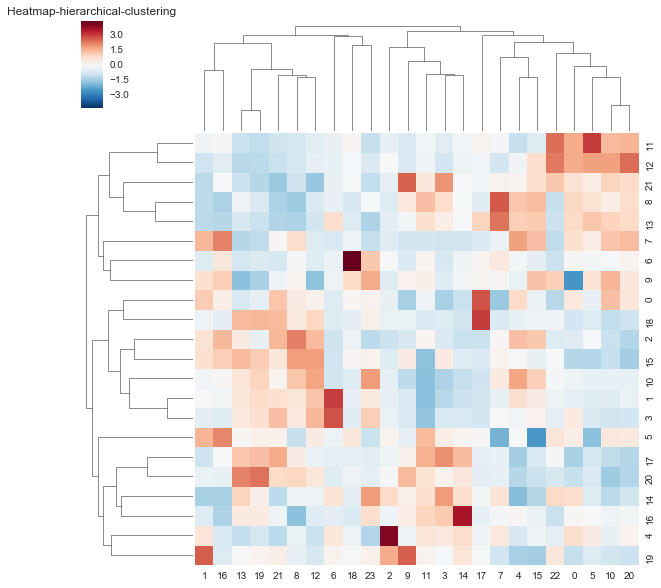

In [9]:
#### Normalize X_statlog ########
from APT_factorization import *
X_statlog_norm = standardize(X_statlog)

print "sparsity = %f"%sparsity(X_statlog_norm)
print "Number of models = %i"%num_model(X_statlog_norm)
print "Number of datasets = %i"%num_dataset(X_statlog_norm)
if sparsity(X_statlog_norm) == 0:
    print "Rank of matrix = %i"%rank(X_statlog_norm)
else:
    print "Matrix contains NaN, cannot define the rank"
print 'Ave_corr_tasks = %f'%ave_corr_rows(X_statlog_norm)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_statlog_norm)
# plot_matrix_with_missing_value(X_statlog_norm)

g = sns.clustermap(X_statlog_norm,metric="euclidean")
plt.title('Heatmap-hierarchical-clustering')
plt.show()

24 24 24
24 24 24
528
528


IndexError: index 27 is out of bounds for axis 1 with size 24

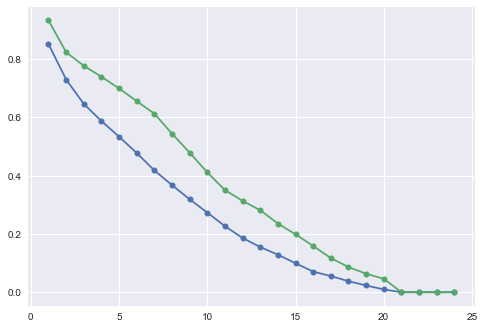

In [67]:
from compare_methods import compare_methods

RMSE_dict, errorbar_dict = compare_methods(X_statlog, methods_to_compare=['SVD', 'APT_backward', 'APT_random', 'SVD_baseline'])

### I.1.2 OpenML (with missing value)

In [12]:
X_openml = np.loadtxt(os.path.join(ORIGINAL_DATA_dir, 'OpenML/OpenML.data'))
X_openml = standardize(X_openml)
# random_cols_openml = np.random.randint(0, X_openml.shape[1], 100)
# print random_cols_openml
# X_openml = X_openml[:, random_cols_openml]
# np.savetxt(os.path.join(STUDIED_DATA_dir, 'OpenML/openml_part.data'), X_openml, fmt='%.3f')

In [13]:
print "sparsity = %f"%sparsity(X_openml)
print "Number of models = %i"%num_model(X_openml)
print "Number of datasets = %i"%num_dataset(X_openml)
if sparsity(X_openml) == 0:
    print "Rank of matrix = %i"%rank(X_openml)
else:
    print "Matrix contains NaN, cannot define the rank"

print 'Ave_corr_tasks = %f'%ave_corr_rows(X_openml)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_openml)
plot_matrix_with_missing_value(X_openml)

sparsity = 0.014625
Number of models = 1623
Number of datasets = 76
Matrix contains NaN, cannot define the rank
Ave_corr_tasks = 0.258562
Ave_corr_algs = 0.397514


TypeError: plot_matrix_with_missing_value() takes exactly 2 arguments (1 given)

In [20]:
####### complete missing values 
from SVD_complete_missingValues import SVD_complete_missingValues
X_openml_comp,_, rec_err_openml, _, = SVD_complete_missingValues(X_openml)
X_openml_comp = standardize(X_openml_comp)
print "sparsity = %f"%sparsity(X_openml_comp)
print "Number of models = %i"%num_model(X_openml_comp)
print "Number of datasets = %i"%num_dataset(X_openml_comp)
if sparsity(X_openml_comp) == 0:
    print "Rank of matrix = %i"%rank(X_openml_comp)
else:
    print "Matrix contains NaN, cannot define the rank"

print 'Ave_corr_tasks = %f'%ave_corr_rows(X_openml_comp)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_openml_comp)
# plot_matrix_with_missing_value(X_openml_comp)
g = sns.clustermap(X_openml_comp, metric="euclidean")
plt.title('Heatmap-hierarchical-clustering')
plt.show()

sparsity = 0.000000
Number of models = 100
Number of datasets = 76
Rank of matrix = 75
Ave_corr_tasks = 0.260989
Ave_corr_algs = 0.255900


TypeError: plot_matrix_with_missing_value() takes exactly 2 arguments (1 given)

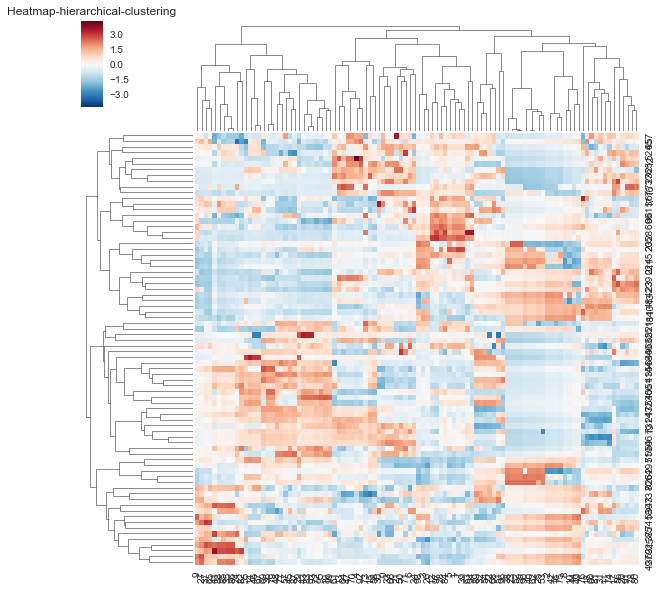

In [25]:
X_openml_comp_norm = standardize(X_openml_comp)
g = sns.clustermap(X_openml_comp_norm, metric="euclidean")
plt.title('Heatmap-hierarchical-clustering')
plt.show()

100 100 100
100 100 100


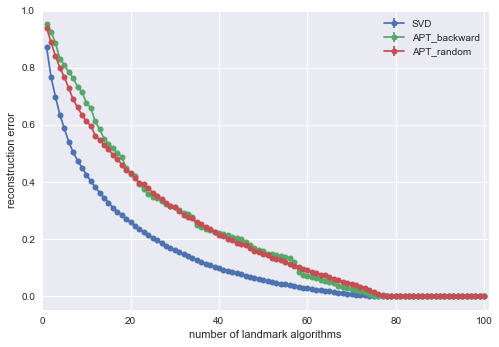

In [59]:
########## APT##############
RMSE_dict_openml, errorbar_dict_openml = compare_methods(X_openml_comp, methods_to_compare=['SVD', 'APT_random', 'APT_backward'], miss_err=True)

### I.1.2 MLcomp (with missing value)

sparsity = 0.165000
Number of models = 10
Number of datasets = 300
Matrix contains NaN, cannot define the rank
Ave_corr_tasks = 0.431692
Ave_corr_algs = nan


/Users/lishengsun/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/lishengsun/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


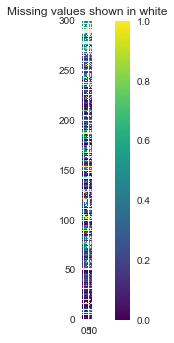

In [98]:
X_mlcomp = np.loadtxt(os.path.join(STUDIED_DATA_dir, 'MLComp/mlcomp.data'))
print "sparsity = %f"%sparsity(X_mlcomp)
print "Number of models = %i"%num_model(X_mlcomp)
print "Number of datasets = %i"%num_dataset(X_mlcomp)
if sparsity(X_mlcomp) == 0:
    print "Rank of matrix = %i"%rank(X_mlcomp)
else:
    print "Matrix contains NaN, cannot define the rank"

print 'Ave_corr_tasks = %f'%ave_corr_rows(X_mlcomp)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_mlcomp)
plot_matrix_with_missing_value(X_mlcomp)

sparsity = 0.000000
Number of models = 10
Number of datasets = 300
Rank of matrix = 10
Ave_corr_tasks = 0.243831
Ave_corr_algs = 0.691227
error = 0.000000


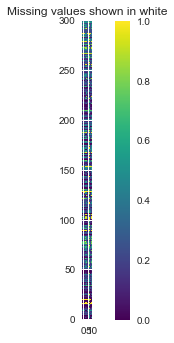

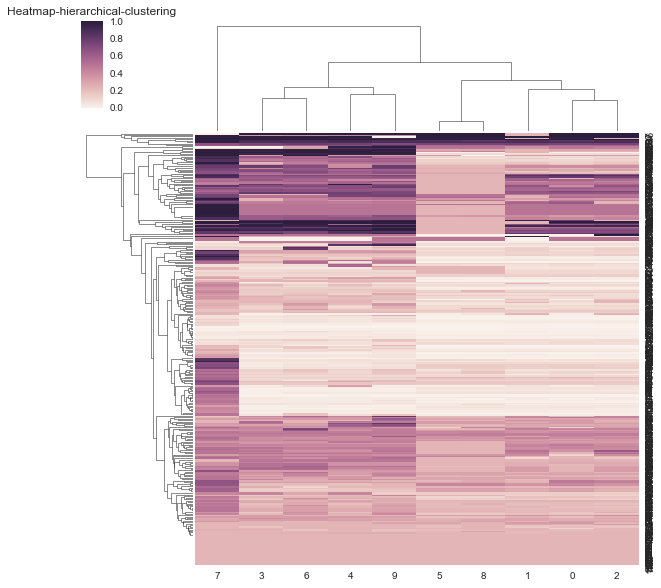

In [117]:
####### complete missing values 
from SVD_complete_missingValues import SVD_complete_missingValues
X_mlcomp_comp,_, rec_err, _, = SVD_complete_missingValues(X_mlcomp)
print "sparsity = %f"%sparsity(X_mlcomp_comp)
print "Number of models = %i"%num_model(X_mlcomp_comp)
print "Number of datasets = %i"%num_dataset(X_mlcomp_comp)
if sparsity(X_mlcomp_comp) == 0:
    print "Rank of matrix = %i"%rank(X_mlcomp_comp)
else:
    print "Matrix contains NaN, cannot define the rank"

print 'Ave_corr_tasks = %f'%ave_corr_rows(X_mlcomp_comp)
print 'Ave_corr_algs = %f'%ave_corr_cols(X_mlcomp_comp)
print 'error = %f'%rec_err
plot_matrix_with_missing_value(X_mlcomp_comp)
g = sns.clustermap(X_mlcomp_comp, metric="euclidean")
plt.title('Heatmap-hierarchical-clustering')
plt.show()

10 10 10


APT_factorization.py:35: RuntimeWarning: invalid value encountered in divide
  XX[r,:] = (XX[r,:]-mu_row[r])/std_row[r]
APT_factorization.py:32: RuntimeWarning: Mean of empty slice
  mu_row = np.nanmean(XX, axis=1) # mean of row


LinAlgError: SVD did not converge

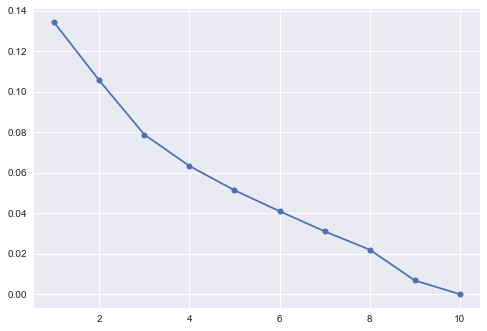

In [119]:
######### APT ##############
RMSE_dict, errorbar_dict = compare_methods(X_mlcomp_comp, methods_to_compare=['SVD', 'APT_random', 'APT_backward'])

## I.2 Generate random data

In [11]:
from random_data_generator import random_data
# S_rank2 = random_data(100, 100, 2) # generate random matrix of rank 2
# S_rank4 = random_data(100, 100, 4) # generate random matrix of rank 4
# S_rank5 = random_data(100, 100, 5) # generate random matrix of rank 6
# S_rank8 = random_data(100, 100, 8) # generate random matrix of rank 8
# np.savetxt(os.path.join(STUDIED_DATA_dir, 'random_data/S_rank5.data'), S_rank5)
S_rank5 = np.loadtxt(os.path.join(STUDIED_DATA_dir, 'random_data/S_rank5.data'))

In [16]:
from APT_factorization import standardize
S_rank5 = standardize(S_rank5)
ave_corr_cols(S_rank5)

0.50006891536280051

In [22]:
# test standardization
from APT_factorization import *
S_rank5 = standardize(S_rank5)

# II. APT

## II.1 APT on random data (no missing value): Complete matrix

### Heatmap Hierarchical clustering of random matrix 100X100, rank 5 (no missing value)

sparsity = 0.000000
Number of models = 100
Number of datasets = 100
Rank of matrix = 5
Ave_corr_tasks = 0.501699
Ave_corr_algs = 0.500069


/Users/lishengsun/anaconda/lib/python2.7/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


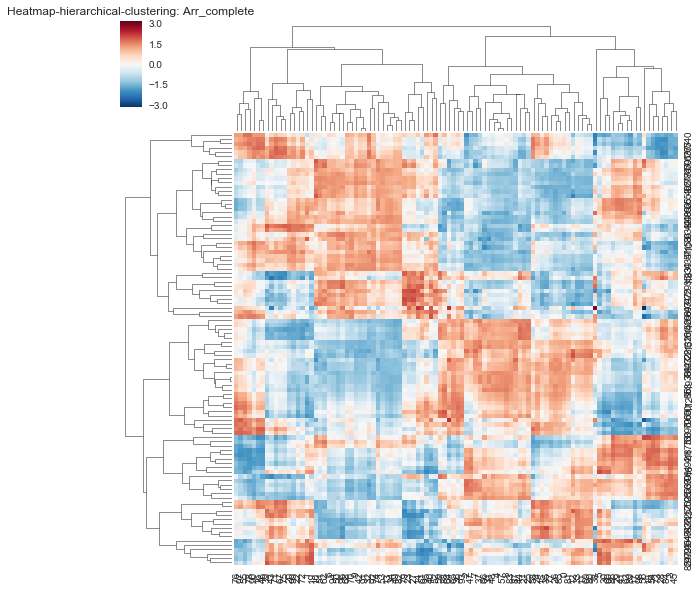

In [24]:
from numpy.linalg import matrix_rank
import math
import matplotlib.pyplot as plt
from APT_factorization import APT_recursiveElimination, APT_random, APT_GramSchmidt

S = S_rank5

print "sparsity = %f"%sparsity(S)
print "Number of models = %i"%num_model(S)
print "Number of datasets = %i"%num_dataset(S)
if sparsity(S) == 0:
    print "Rank of matrix = %i"%rank(S)
else:
    print "Matrix contains NaN, cannot define the rank"

print 'Ave_corr_tasks = %f'%ave_corr_rows(S)
print 'Ave_corr_algs = %f'%ave_corr_cols(S)
# plot_matrix_with_missing_value(S)

import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(S,metric='euclidean')

plt.title('Heatmap-hierarchical-clustering: Arr_complete')
plt.xticks([])

plt.show()


### APT / SVD on random matrix 100X100, rank 5 (no missing value)

In [48]:
print "Rank of matrix = %i"%rank(S)

Rank of matrix = 5


Takes time!! Don't rerun it if no need!!!

iteration:  0


APT_factorization.py:39: RuntimeWarning: invalid value encountered in divide
  XX[r,:] = (XX[r,:]-mu_row[r])/std_row[r]
APT_factorization.py:35: RuntimeWarning: Mean of empty slice
  mu_row = np.nanmean(XX, axis=1) # mean of row


iteration:  1
iteration:  2
iteration:  3
iteration:  4


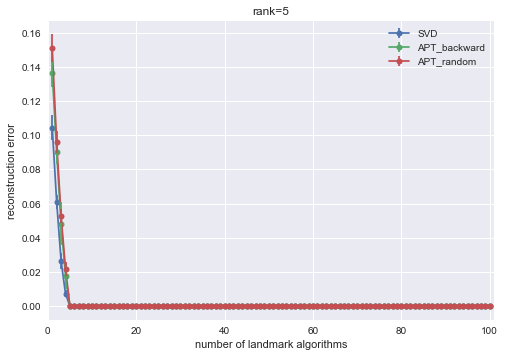

In [62]:
from compare_methods_for_random_data import *
RMSE_dict_random, errorbar_dict_random = compare_methods_for_random_data(num_iter=5)

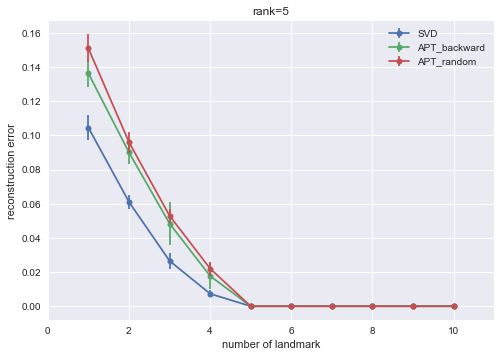

In [64]:
for method in ['SVD', 'APT_backward', 'APT_random']:
	plt.errorbar(range(1,11), RMSE_dict_random[method][:10], yerr=errorbar_dict_random[method][:10], label=method, linestyle='-', marker='o', markersize=6, barsabove=True)
plt.xlim(0,10+1)	
plt.xlabel('number of landmark')
plt.ylabel('reconstruction error')
plt.legend()
plt.title('rank=5')
plt.show()

In [45]:
U,s,V = np.linalg.svd(S)

In [47]:
U.shape

(100, 100)

## II.2 APT on random data (with missing value)

### Visualization of random matrix 100X100, rank 5 (missing value fraction = 0.3)

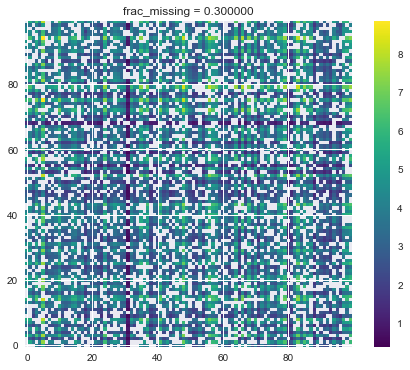

In [161]:
S = random_data(100, 100, 5) # rank 5
frac_missing = 0.3
S_miss = add_missing_value(S, frac_missing)
plot_matrix_with_missing_value(S_miss, frac_missing=frac_missing)

### Heatmap Hierarchical clustering of random matrix 100X100, rank 5 (missing value fraction = 0.1)

In [162]:
S_miss.shape
np.where(np.isnan(S_miss))

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  1,  2, ..., 93, 96, 99]))

sparsity = 0.000000
Number of models = 100
Number of datasets = 100
Rank of matrix = 100
Ave_corr_tasks = 0.569791
Ave_corr_algs = 0.546122


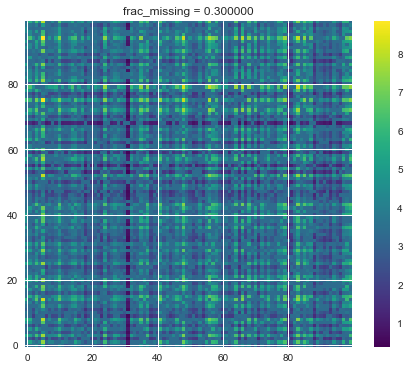

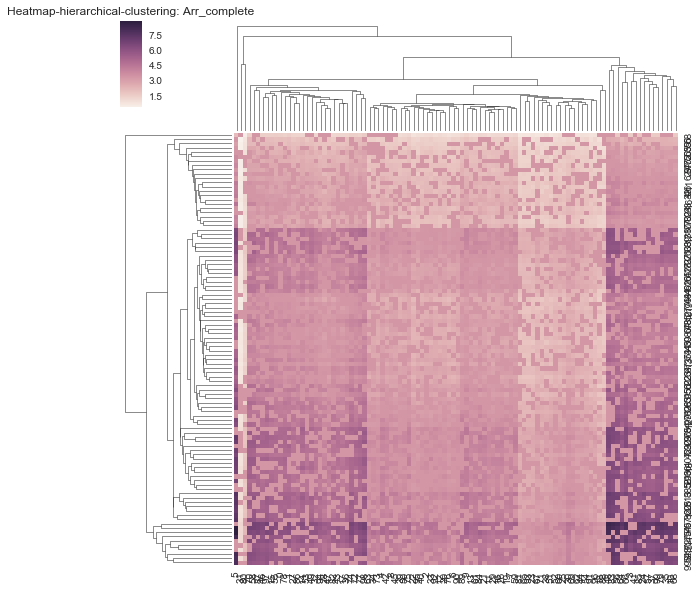

In [165]:
from numpy.linalg import matrix_rank
S_miss,_, rec_err_artmiss, _, = SVD_complete_missingValues(S_miss)
print "sparsity = %f"%sparsity(S_miss)
print "Number of models = %i"%num_model(S_miss)
print "Number of datasets = %i"%num_dataset(S_miss)
if sparsity(S_miss) == 0:
    print "Rank of matrix = %i"%rank(S_miss)
else:
    print "Matrix contains NaN, cannot define the rank"

print 'Ave_corr_tasks = %f'%ave_corr_rows(S_miss)
print 'Ave_corr_algs = %f'%ave_corr_cols(S_miss)
plot_matrix_with_missing_value(S_miss, frac_missing=0.3)

import seaborn as sns; sns.set(color_codes=True)
g = sns.clustermap(S_miss,metric='euclidean')

plt.title('Heatmap-hierarchical-clustering: Arr_complete')
plt.xticks([])

plt.show()

### APT / SVD on random matrix 100X100, rank 5 (missing value fraction = 0.1)


Takes time!! Don't rerun it if no need!!!

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4


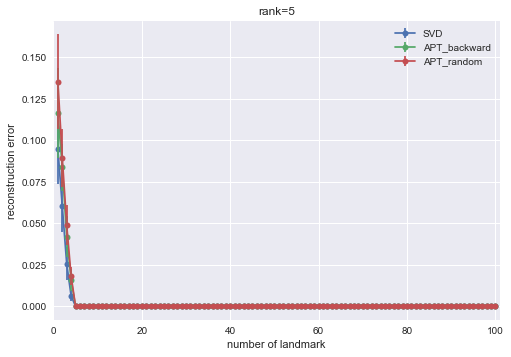

In [124]:
RMSE_dict_random_miss, errorbar_dict_random_miss = compare_methods_for_random_data(num_iter=5, missing=True, shape=(100, 100), rank=5)

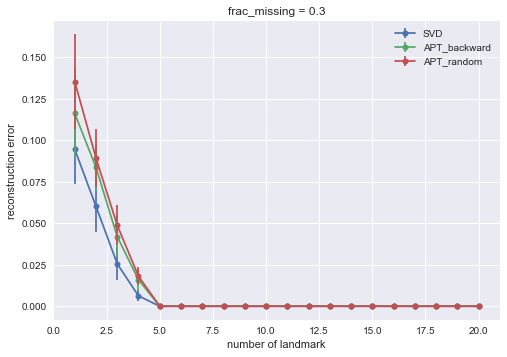

In [125]:
for method in ['SVD', 'APT_backward', 'APT_random']:
	plt.errorbar(range(1,21), RMSE_dict_random_miss[method][:20], yerr=errorbar_dict_random_miss[method][:20], label=method, linestyle='-', marker='o', markersize=6, barsabove=True)
plt.xlim(0,20+1)	
plt.xlabel('number of landmark')
plt.ylabel('reconstruction error')
plt.legend()
plt.title('frac_missing = 0.3')
plt.show()

## On-going: Testing GramSchmidt and other forward selection on smaller matrix

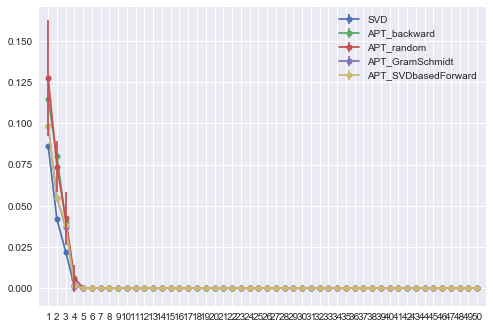

In [32]:
from compare_methods import compare_methods
S_petit = random_data(50, 50, 5)
RMSE_dict, errorbar_dict = compare_methods(S_petit, miss_err=True)

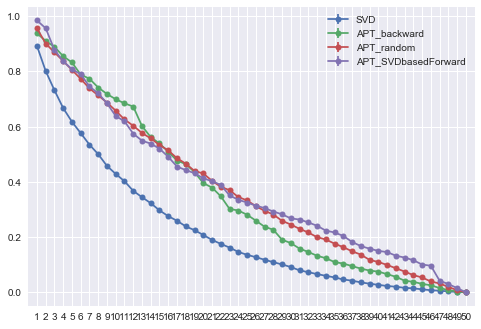

In [22]:
from compare_methods import compare_methods
S_petit = random_data(50, 50, 5)
frac_missing = 0.2
S_petit_miss = add_missing_value(S_petit, frac_missing)
RMSE_dict, errorbar_dict = compare_methods(S_petit_miss, miss_err=True, methods_to_compare=['SVD', 'APT_backward', 'APT_random', 'APT_SVDbasedForward'])

In [35]:
# errorbar_dict